Entrenamiento personalizado (basics)
===

* *30 min* | Última modificación: Julio 12, 2019

## Preparación

In [1]:
import tensorflow as tf
tf.enable_eager_execution()

## Variables

In [2]:
x = tf.zeros([10, 10])
x += 2  
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.0)
print(v.numpy())

1.0


In [4]:
v.assign(3.0)
print(v.numpy())

3.0


In [5]:
v.assign(tf.square(v))
print(v.numpy())

9.0


## Entrenamiento de un modelo lineal

### Definición del modelo

In [6]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(1.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

print(model(3.0).numpy())

3.0


### Función de pérdida

In [7]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Generación de datos usando TensorFlow

In [8]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

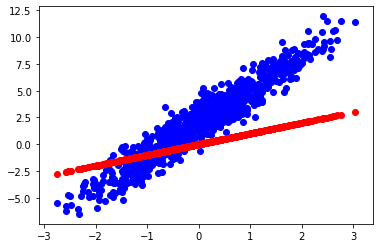

Current loss: 
9.372494


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show();

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

### Algoritmo de entrenamiento

In [10]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

### Estimación de los parámetros del modelo

Epoch  0: W=1.00 b=0.00, loss=9.37249
Epoch  1: W=1.43 b=0.41, loss=6.25429
Epoch  2: W=1.76 b=0.73, loss=4.28665
Epoch  3: W=2.03 b=0.99, loss=3.04503
Epoch  4: W=2.24 b=1.20, loss=2.26155
Epoch  5: W=2.41 b=1.36, loss=1.76716
Epoch  6: W=2.55 b=1.49, loss=1.45518
Epoch  7: W=2.65 b=1.59, loss=1.25832
Epoch  8: W=2.74 b=1.67, loss=1.13409
Epoch  9: W=2.80 b=1.74, loss=1.05570


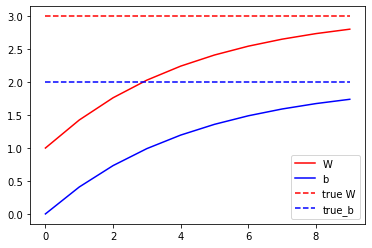

In [11]:
model = Model()

Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))

plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')

plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')

plt.legend(['W', 'b', 'true W', 'true_b'])

plt.show()